<a href="https://colab.research.google.com/github/awhitehouse1/DS4002-Project-2/blob/main/NewCode10_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
file_path = "/content/NEW_time_series_data.csv"
data = pd.read_csv(file_path)


In [4]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # auto-detects ISO8601 format like "2020-01-22"
data.dropna(subset=['Date'], inplace=True)  # Drop rows where date parsing failed

# Verify the conversion
print(data['Date'].head())

0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
Name: Date, dtype: datetime64[ns]


In [5]:
# Define lists of countries
high_gdp_democracy_countries = ["United States", "Germany", "United Kingdom", "Canada", "France",
                                "Japan", "Australia", "Switzerland", "Sweden", "Netherlands"]
low_gdp_democracy_countries = ["Haiti", "Zimbabwe", "Afghanistan", "Chad", "Ethiopia",
                               "Yemen", "Rwanda", "Uganda", "Mozambique", "Sudan"]

# Filter data for these countries
selected_countries = high_gdp_democracy_countries + low_gdp_democracy_countries
data = data[data['Country'].isin(selected_countries)]

In [6]:
# Extract Year and Month from Date
data['Year-Month'] = data['Date'].dt.to_period('M')

# Group by country and year-month, aggregating by mean for consistency
monthly_data = data.groupby(['Country', 'Year-Month']).agg({
    'total_deaths_per_million': 'max',  # cumulative max at each month
    'new_deaths_per_million': 'sum',    # sum of new cases in the month
    'GDP_per_Capita': 'first',
    'Democracy score': 'first'
}).reset_index()

# Convert 'Year-Month' back to a datetime object for plotting and modeling
monthly_data['Year-Month'] = monthly_data['Year-Month'].dt.to_timestamp()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


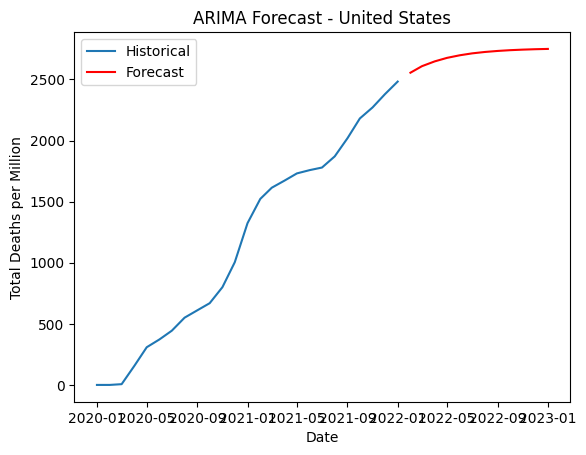

In [7]:
# Choose a specific country, e.g., 'United States'
us_data = monthly_data[monthly_data['Country'] == 'United States'].set_index('Year-Month')

# Fit an ARIMA model for total deaths per million
arima_model = ARIMA(us_data['total_deaths_per_million'], order=(1, 1, 1))
arima_model_fit = arima_model.fit()

# Plotting the actual and forecasted data
forecast = arima_model_fit.forecast(steps=12)
plt.plot(us_data['total_deaths_per_million'], label='Historical')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast - United States')
plt.xlabel('Date')
plt.ylabel('Total Deaths per Million')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


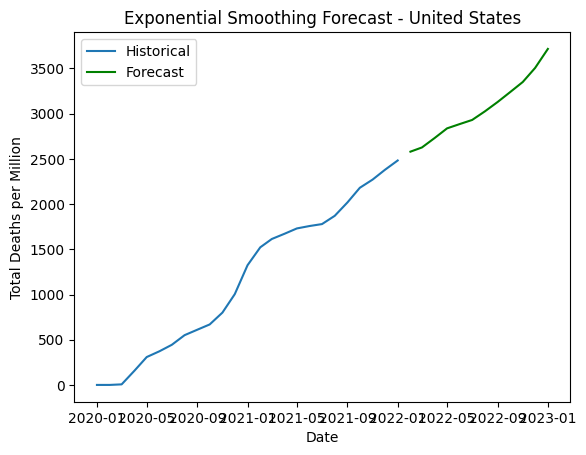

In [8]:
# Use Exponential Smoothing for 'United States'
exp_smoothing_model = ExponentialSmoothing(us_data['total_deaths_per_million'], trend='add', seasonal='add', seasonal_periods=12)
exp_smoothing_model_fit = exp_smoothing_model.fit()

# Forecasting the next 12 months
exp_forecast = exp_smoothing_model_fit.forecast(steps=12)
plt.plot(us_data['total_deaths_per_million'], label='Historical')
plt.plot(exp_forecast, label='Forecast', color='green')
plt.title('Exponential Smoothing Forecast - United States')
plt.xlabel('Date')
plt.ylabel('Total Deaths per Million')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


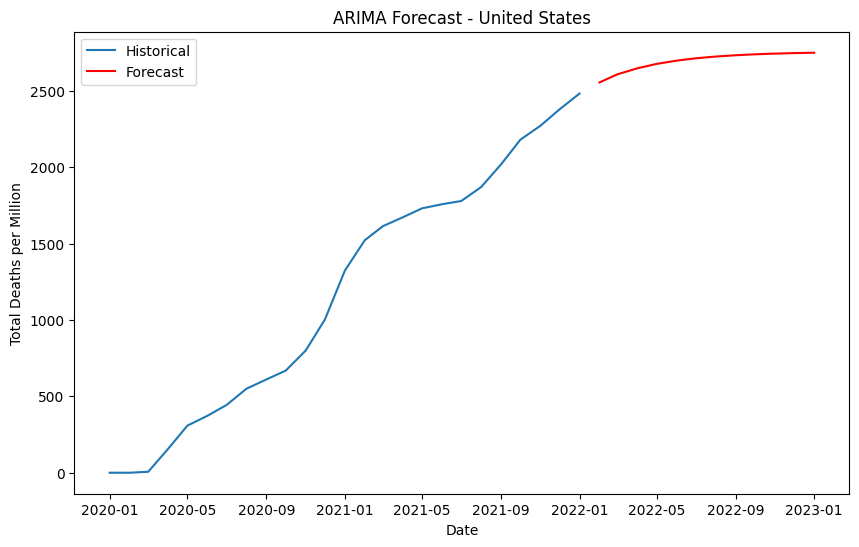

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


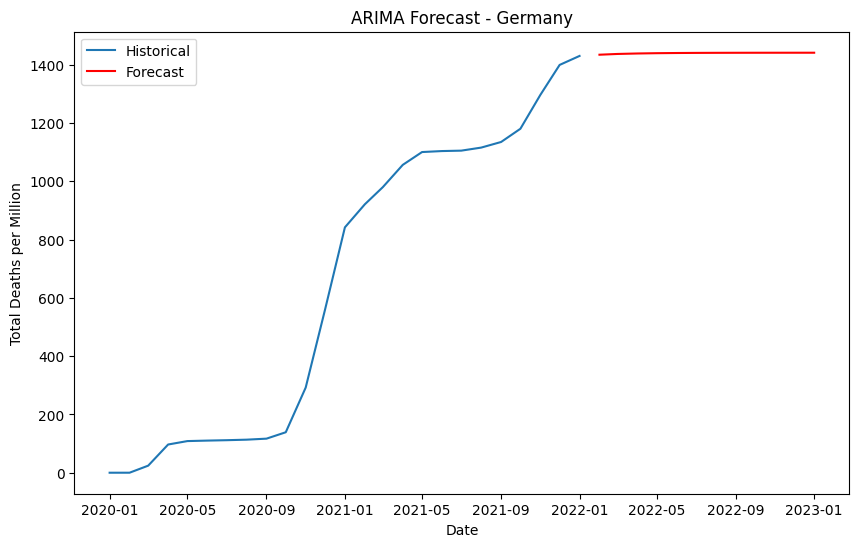

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


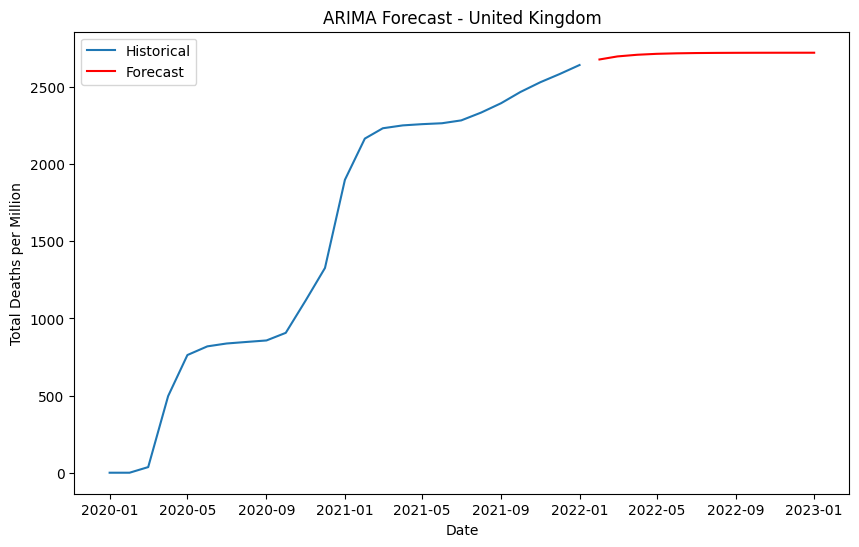

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


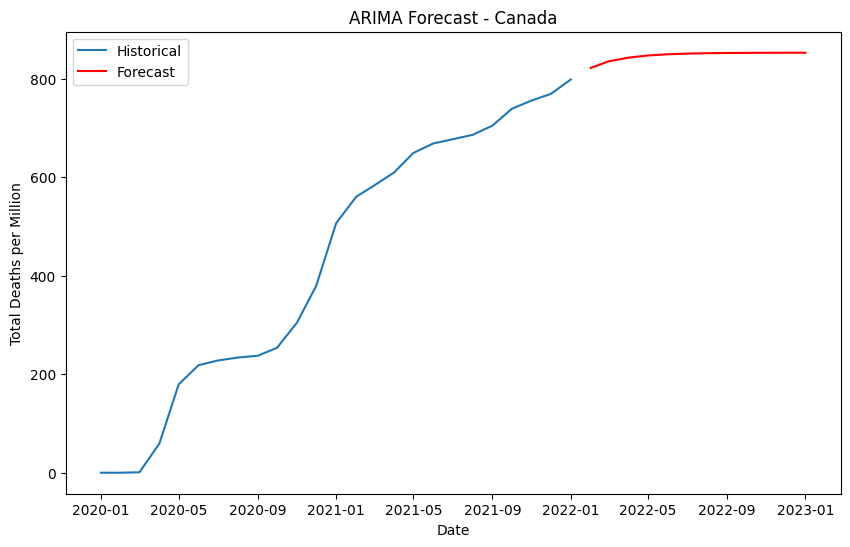

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


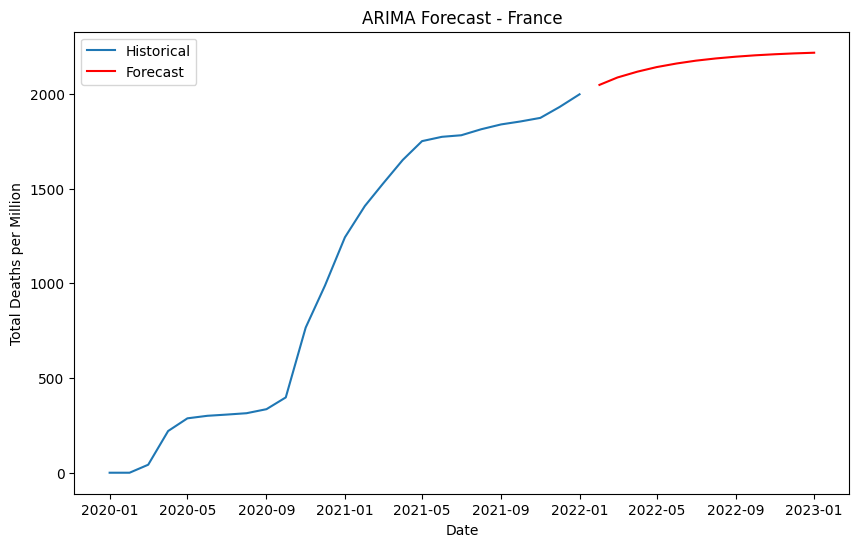

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


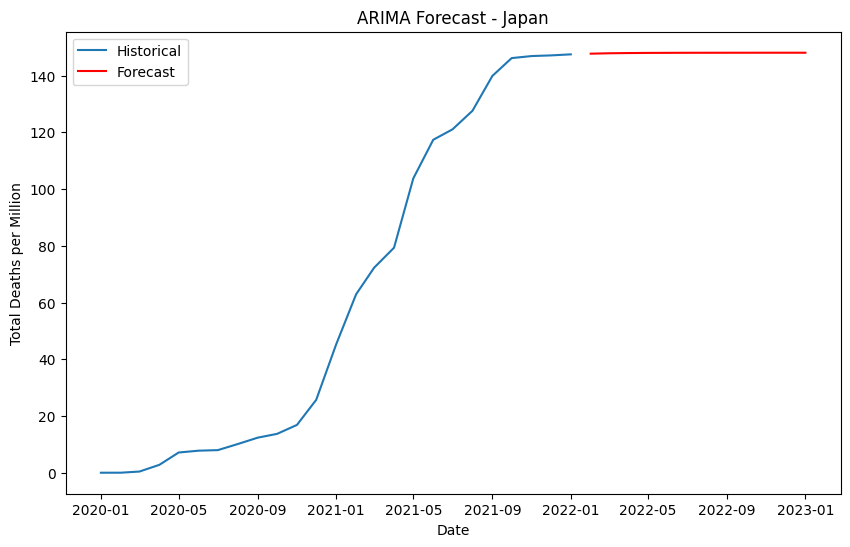

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


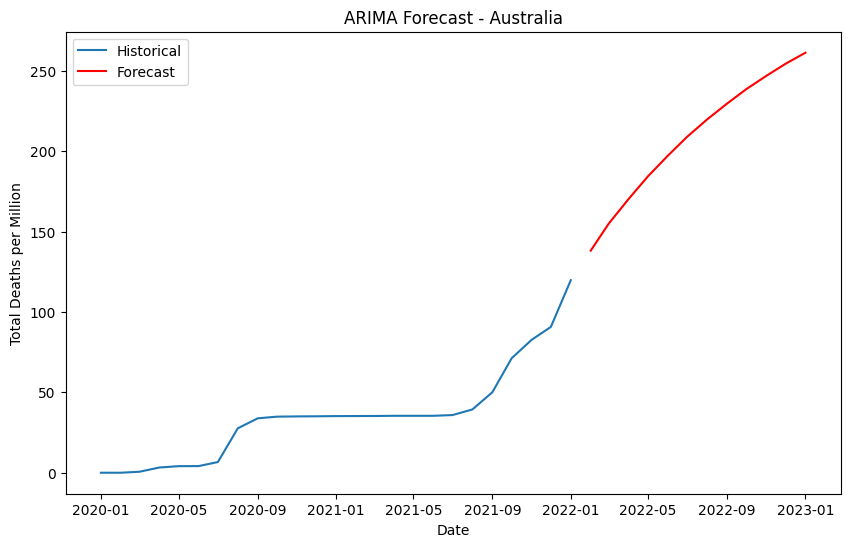

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


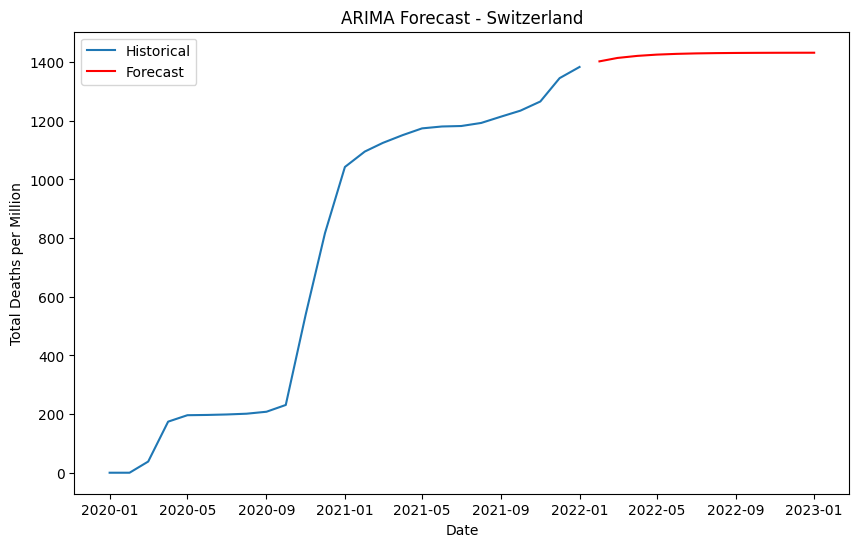

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


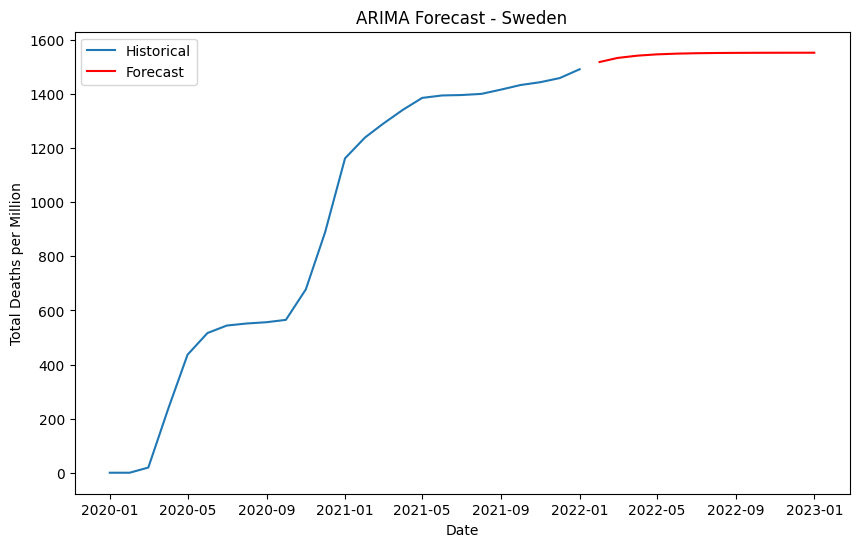

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


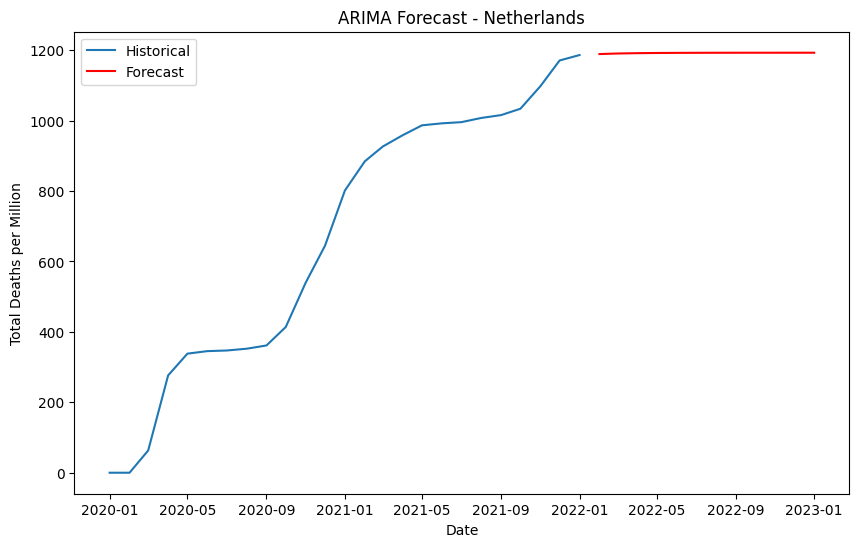

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


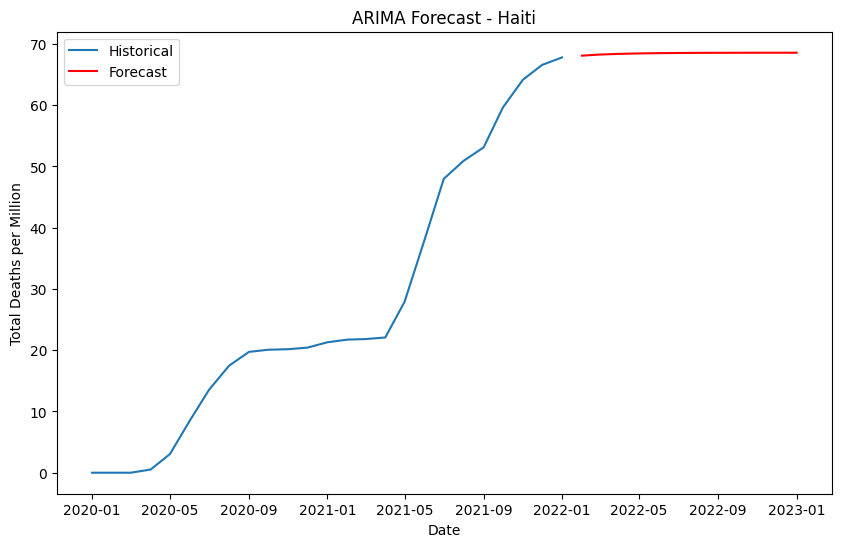

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


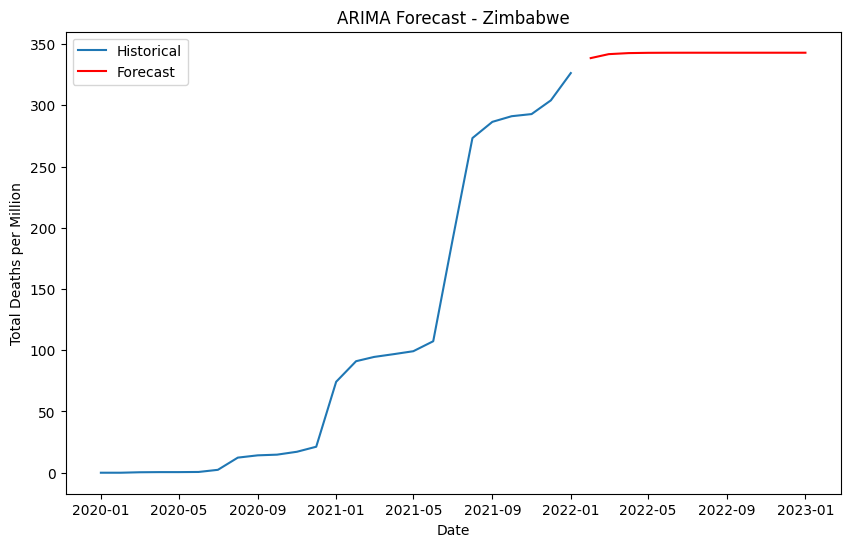

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


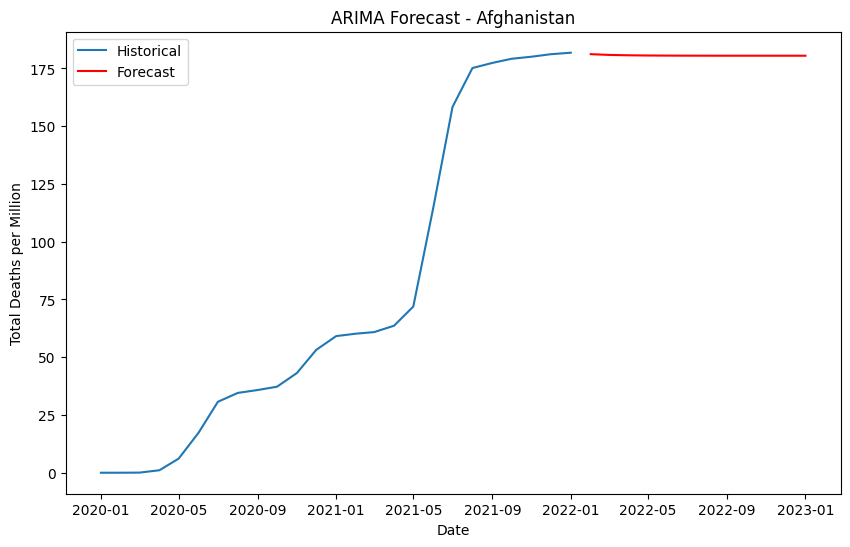

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


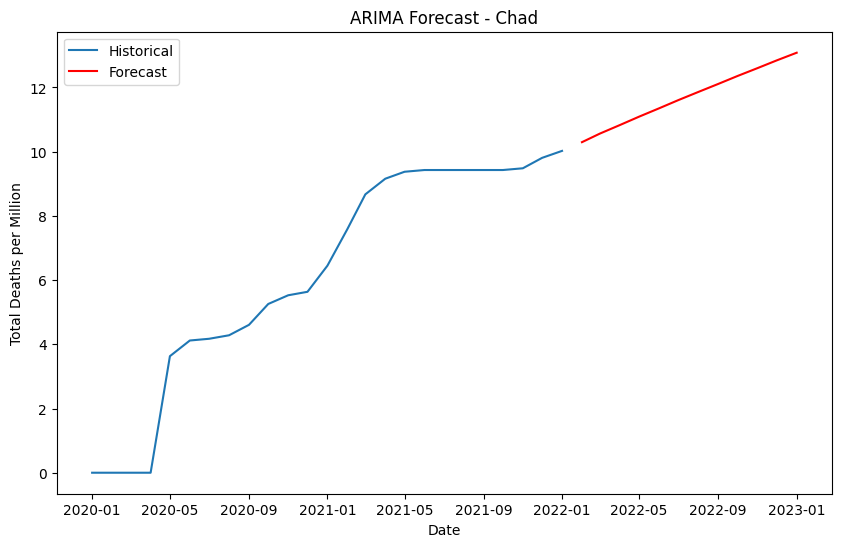

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


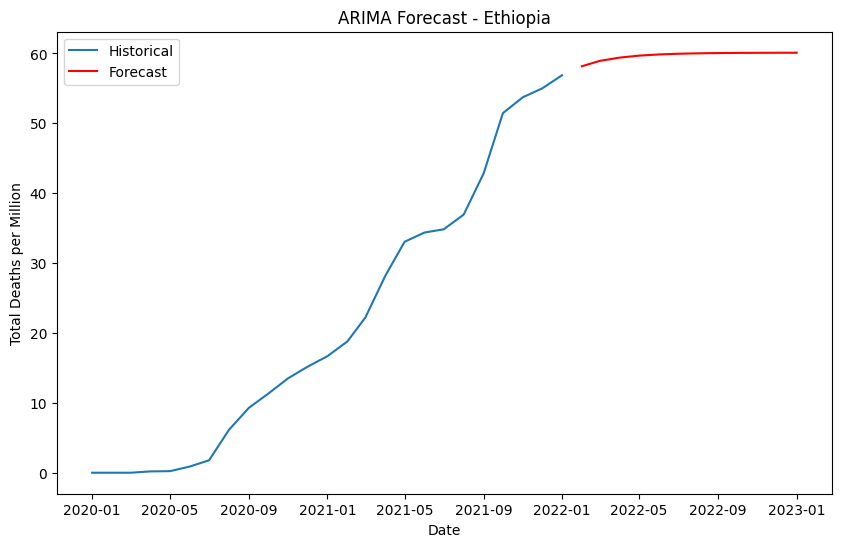

Not enough data to fit ARIMA model for Yemen.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


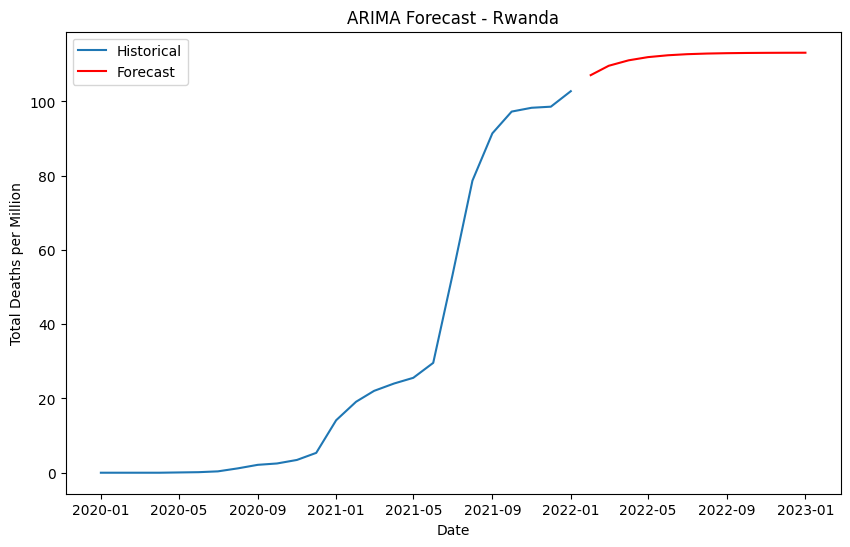

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


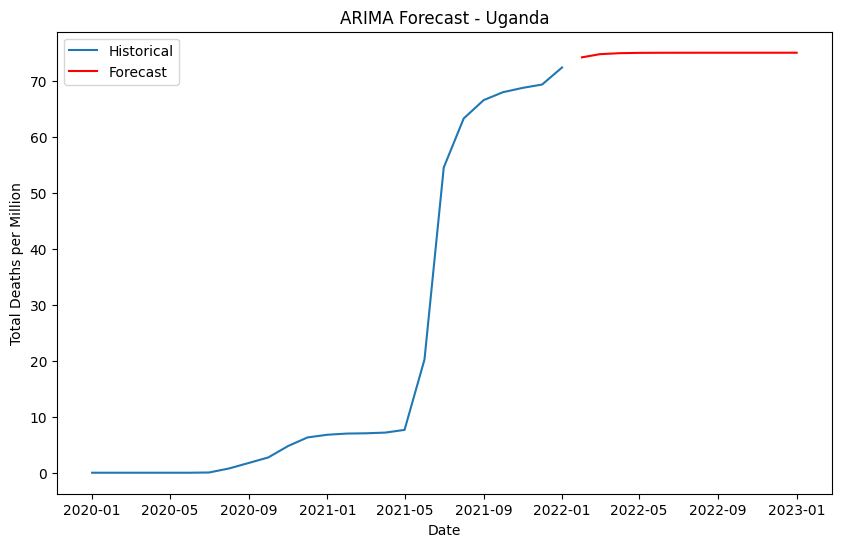

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


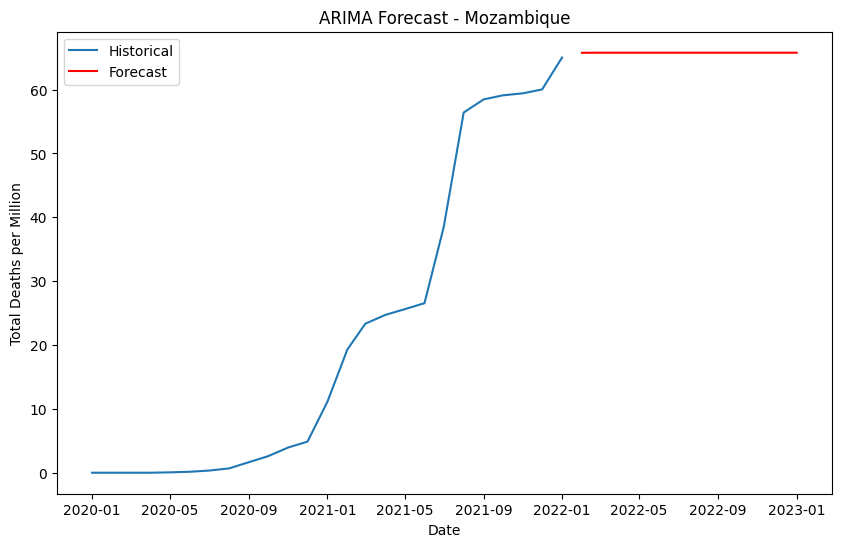

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


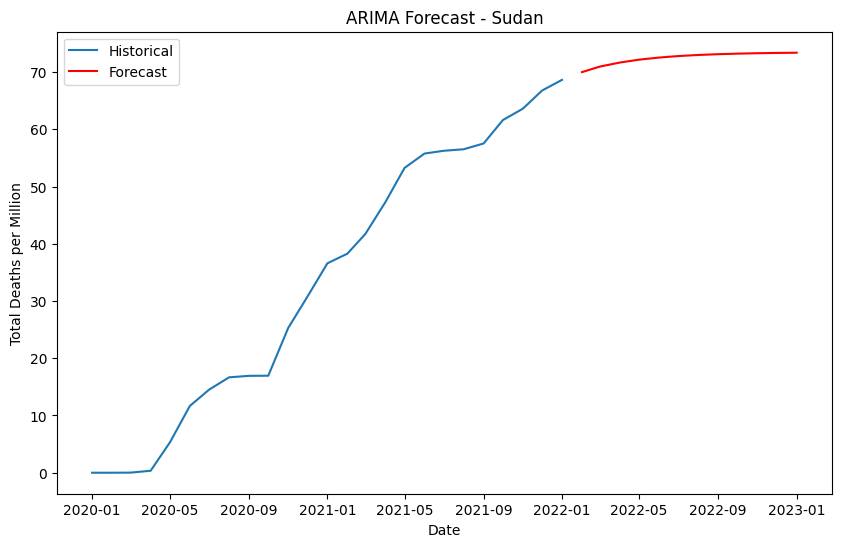

In [9]:
# Define ARIMA order (1,1,1) as an example; you might need to adjust it for other countries if it doesn’t fit well
arima_order = (1, 1, 1)

# Loop through each country in the selected list
for country in selected_countries:
    # Filter data for the current country
    country_data = monthly_data[monthly_data['Country'] == country].set_index('Year-Month')

    # Check if there is enough data to fit the model
    if len(country_data) > 12:  # Require at least 12 months of data
        try:
            # Fit the ARIMA model
            arima_model = ARIMA(country_data['total_deaths_per_million'], order=arima_order)
            arima_model_fit = arima_model.fit()

            # Forecast for the next 12 months
            forecast = arima_model_fit.forecast(steps=12)

            # Plotting
            plt.figure(figsize=(10, 6))
            plt.plot(country_data['total_deaths_per_million'], label='Historical')
            plt.plot(forecast, label='Forecast', color='red')
            plt.title(f'ARIMA Forecast - {country}')
            plt.xlabel('Date')
            plt.ylabel('Total Deaths per Million')
            plt.legend()
            plt.show()

        except Exception as e:
            print(f"ARIMA model could not be fit for {country}. Error: {e}")
    else:
        print(f"Not enough data to fit ARIMA model for {country}.")


In [10]:
# Initialize an empty dictionary to store forecasts
forecast_dict = {}

# Loop through each country and store forecasts
for country in selected_countries:
    country_data = monthly_data[monthly_data['Country'] == country].set_index('Year-Month')

    if len(country_data) > 12:
        try:
            arima_model = ARIMA(country_data['total_deaths_per_million'], order=arima_order)
            arima_model_fit = arima_model.fit()
            forecast = arima_model_fit.forecast(steps=12)

            # Store forecast in dictionary
            forecast_dict[country] = forecast

        except Exception as e:
            print(f"ARIMA model could not be fit for {country}. Error: {e}")
    else:
        print(f"Not enough data to fit ARIMA model for {country}.")

# Convert forecasts to DataFrame for easy handling
forecast_df = pd.DataFrame(forecast_dict)
print(forecast_df.head())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Not enough data to fit ARIMA model for Yemen.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

            United States      Germany  United Kingdom      Canada  \
2022-02-01    2555.042183  1434.692359     2678.305050  821.657234   
2022-03-01    2608.418686  1437.304087     2698.055029  835.000499   
2022-04-01    2647.646586  1438.924937     2708.896383  842.581225   
2022-05-01    2676.476277  1439.930845     2714.847527  846.888074   
2022-06-01    2697.664031  1440.555116     2718.114288  849.334929   

                 France       Japan   Australia  Switzerland       Sweden  \
2022-02-01  2048.286276  147.706443  138.172366  1402.518761  1518.457373   
2022-03-01  2087.372409  147.846506  154.974646  1414.132361  1533.506424   
2022-04-01  2118.101915  147.928436  170.345200  1421.182562  1541.971672   
2022-05-01  2142.261442  147.976362  184.406026  1425.462486  1546.733462   
2022-06-01  2161.255654  148.004396  197.268726  1428.060675  1549.412019   

            Netherlands      Haiti    Zimbabwe  Afghanistan       Chad  \
2022-02-01  1188.846060  68.097362  338.49

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


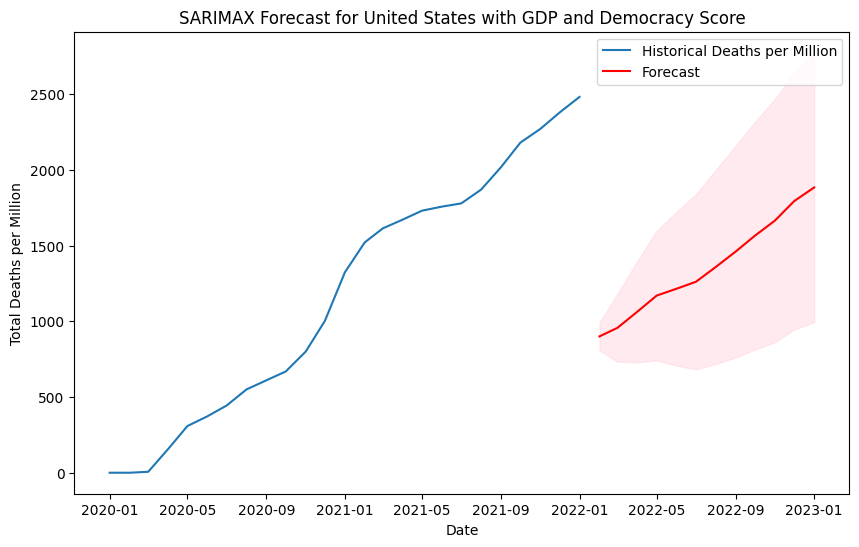

In [11]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Filter data for a specific country
country = "United States"  # Example country
country_data = monthly_data[monthly_data['Country'] == country].set_index('Year-Month')

# Make sure data is complete and aligned
country_data = country_data[['total_deaths_per_million', 'GDP_per_Capita', 'Democracy score']].dropna()

# Define the endogenous and exogenous variables
endog = country_data['total_deaths_per_million']
exog = country_data[['GDP_per_Capita', 'Democracy score']]

# Fit the SARIMAX model
model = SARIMAX(endog, exog=exog, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
model_fit = model.fit(disp=False)

# Forecast for the next 12 months using current GDP and Democracy score values
forecast = model_fit.get_forecast(steps=12, exog=exog[-12:])
forecast_ci = forecast.conf_int()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(endog, label='Historical Deaths per Million')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title(f'SARIMAX Forecast for {country} with GDP and Democracy Score')
plt.xlabel('Date')
plt.ylabel('Total Deaths per Million')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Initialize a dictionary to store results for each country
results = []

# Loop over the list of selected countries
for country in selected_countries:  # Replace 'selected_countries' with your list of country names
    # Filter data for each country
    country_data = monthly_data[monthly_data['Country'] == country].set_index('Year-Month')

    # Make sure data is complete and aligned
    country_data = country_data[['total_deaths_per_million', 'GDP_per_Capita', 'Democracy score']].dropna()

    # Define the endogenous and exogenous variables
    endog = country_data['total_deaths_per_million']
    exog = country_data[['GDP_per_Capita', 'Democracy score']]

    # Fit the SARIMAX model
    try:
        model = SARIMAX(endog, exog=exog, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
        model_fit = model.fit(disp=False)

        # Perform a 12-month forecast
        forecast = model_fit.get_forecast(steps=12, exog=exog[-12:])
        forecast_values = forecast.predicted_mean
        actual_values = endog[-12:]  # Use the last 12 values as the "actual" data for error metrics

        # Calculate error metrics
        mae = mean_absolute_error(actual_values, forecast_values)
        mse = mean_squared_error(actual_values, forecast_values)
        rmse = sqrt(mse)
        mape = np.mean(np.abs((actual_values - forecast_values) / actual_values)) * 100

        # Append the results to the list
        results.append({
            'Country': country,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'MAPE': mape
        })

    except Exception as e:
        print(f"Modeling failed for {country}: {e}")

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)
print(results_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: Va

Modeling failed for Yemen: zero-size array to reduction operation maximum which has no identity


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No freq

           Country         MAE            MSE        RMSE  MAPE
0    United States  581.649221  340103.810187  583.184199   NaN
1          Germany  404.795121  165875.498460  407.278159   NaN
2   United Kingdom  961.464097  944835.265743  972.026371   NaN
3           Canada  268.507509   72909.417033  270.017438   NaN
4           France  773.344214  607549.824175  779.454825   NaN
5            Japan   78.674734    6318.095655   79.486450   NaN
6        Australia  110.396368   12195.374337  110.432669   NaN
7      Switzerland  407.609853  174499.080437  417.730871   NaN
8           Sweden  170.880573   39473.650453  198.679769   NaN
9      Netherlands  485.452512  238604.412346  488.471506   NaN
10           Haiti   46.363534    2149.638256   46.364192   NaN
11        Zimbabwe  201.037016   42272.208282  205.602063   NaN
12     Afghanistan   95.053097    9333.081282   96.607874   NaN
13            Chad    3.373563      11.820335    3.438071   NaN
14        Ethiopia   49.705844    2482.4

In [ ]:
# MAE Mean Absolute Error
# lowest MAE is for Chad (3.37) indicating that on average, the model's forecast
# deviates from the actual number of deaths by 3.4 deaths per million
# highest MAE is for UK (961.46)